In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../../data/food_crop_data.csv')
df.head()

,Domain,Area,Element,Item,Year,Value
0,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1990,10.629803
1,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1991,10.934600
2,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1992,11.138956
3,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1993,11.335046
4,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1994,11.754348


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Element'] = le.fit_transform(df['Element'])
df['Item'] = le.fit_transform(df['Item'])
df['Domain'] = le.fit_transform(df['Domain'])

In [5]:
X = df.drop(['Element'],axis=1)
y = df['Element']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=46)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.7452471482889734
Confusion Matrix: [[ 73   0   0   0]
 [  0   9   0  67]
 [  0   0  10   0]
 [  0   0   0 104]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      0.12      0.21        76
           2       1.00      1.00      1.00        10
           3       0.61      1.00      0.76       104

    accuracy                           0.75       263
   macro avg       0.90      0.78      0.74       263
weighted avg       0.85      0.75      0.68       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


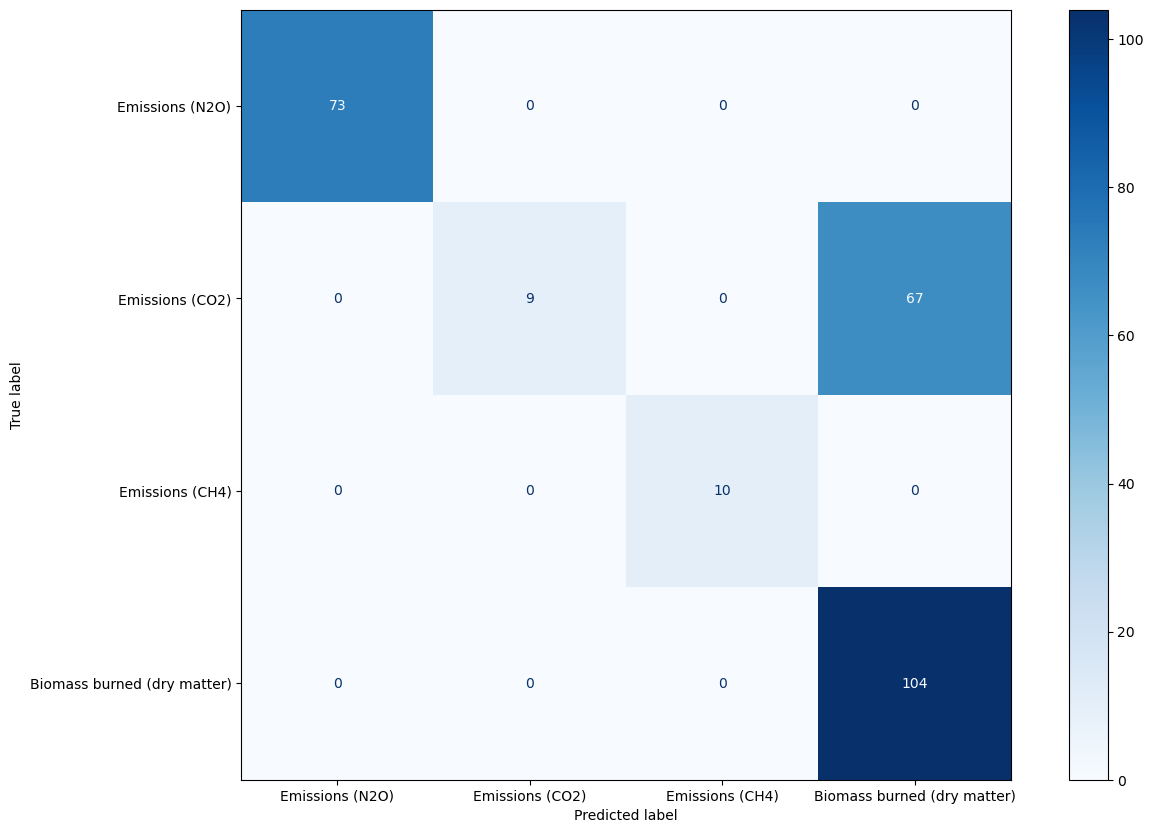

In [6]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(gnb,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()